***Exploring data on COVID-19***

See guideline on how to install julia(https://julialang.org/) on your platform and how to start using it with

jupyter notebook

jupyter lab

Windows CMD

Windows PowerShell.

using Interact
using CSV etc..
are packages used to interact and manipulate data.These are installed once.

In Windows CMD/Windows Powerhsell (have not used Julia on Mac yet) enter the following:

import Pkg (press enter/return)

pkg.add("Interact")(press enter/return)

Repeat steps with additional packages

In [40]:
using Interact
using CSV
using DataFrames
using Dates
using PlotThemes

In [41]:
# Open your web browser and search for johns hopkins coronavirus data github -> CSSEGISandData/COVID-19->COVID-19
# ->csse_covid_19_data->csse covid 19 timer series. Select the time series covid19 confirmed global.csv file and on the top
# right corner of the page click on raw. You will be presented with the actual csv file and proceed into copying the whole link
# in the web browser search bar.

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [42]:
url

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

download() retrievs the data. Note the arguments in parentheses

In [43]:
#File will be downloaded in the same directory(folder) where the .ipynb file is located
download(url, "covid_19_confirmed_global.csv") 

"covid_19_confirmed_global.csv"

In [44]:
CSV.read("covid_19_confirmed_global.csv") #run the function 'read' from the package CSV

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64,Float64,Int64
1,missing,Afghanistan,33.0,65.0,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [45]:
data = CSV.read("covid_19_confirmed_global.csv"); # semi-colon supresses the display of the output

In [46]:
typeof(data)

DataFrame

In [47]:
data

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64,Float64,Int64
1,missing,Afghanistan,33.0,65.0,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [48]:
datacopy = rename!(data, 1 => "province", 2 => "country") 
# !, bang, is a convention: function that "modifies" its argument in place

,province,country,Lat,Long,1/22/20
,String?,String,Float64,Float64,Int64
1,missing,Afghanistan,33.0,65.0,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [49]:
datacopy

,province,country,Lat,Long,1/22/20
,String?,String,Float64,Float64,Int64
1,missing,Afghanistan,33.0,65.0,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


Whe are using Interact here with @manipulate for testing purposes. Feel free to play around with it

In [50]:
@manipulate for i in 1:10
    HTML(i)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 10,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Hp EliteBook\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Hp EliteBook\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Hp EliteBook\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Hp EliteBook\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Hp EliteBook\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000001380dfb0, Task (runnable) @0x000000001380dfb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"15540369054787471414\",\"id\":\"1

In [51]:
countries = datacopy[:, 2] # A shorter way to extract all the data from column 2

266-element WeakRefStrings.StringArray{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "Sierra Leone"
 "Netherlands"
 "Malawi"
 "United Kingdom"
 "France"
 "South Sudan"
 "Western Sahara"
 "Sao Tome and Principe"
 "Yemen"
 "Comoros"
 "Tajikistan"
 "Lesotho"

In [52]:
countries = collect(datacopy[:, 2])

266-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "Sierra Leone"
 "Netherlands"
 "Malawi"
 "United Kingdom"
 "France"
 "South Sudan"
 "Western Sahara"
 "Sao Tome and Principe"
 "Yemen"
 "Comoros"
 "Tajikistan"
 "Lesotho"

In [53]:
uniquecountries = unique(countries)

188-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 ⋮
 "MS Zaandam"
 "Botswana"
 "Burundi"
 "Sierra Leone"
 "Malawi"
 "South Sudan"
 "Western Sahara"
 "Sao Tome and Principe"
 "Yemen"
 "Comoros"
 "Tajikistan"
 "Lesotho"

In [54]:
@manipulate for i in 1:length(countries)
    countries[i]
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 266,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
133, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Hp EliteBook\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Hp EliteBook\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Hp EliteBook\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Hp EliteBook\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Hp EliteBook\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000001342f6b0, Task (runnable) @0x000000001342f6b0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\"

Extract data and plot

In [55]:
@manipulate for i in 1:length(countries)
    datacopy[i, 1:10] # column 1 through 10
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 266,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
133, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Hp EliteBook\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Hp EliteBook\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Hp EliteBook\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Hp EliteBook\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Hp EliteBook\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000134642f0, Task (runnable) @0x00000000134642f0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\"

In [56]:
startswith("South", "S")

true

Array comprehension

In [57]:
scountries = [startswith(country, "South") for country in countries]

266-element Array{Bool,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0

In [58]:
datacopy[scountries, :]

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String?,String,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,missing,South Africa,-30.5595,22.9375,0,0,0,0,0
2,missing,South Sudan,6.877,31.307,0,0,0,0,0


In [59]:
countries .== "South Africa" 
# period before == is "broadcasting": apply operation to each element of a vector

266-element BitArray{1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [60]:
sa = [startswith(country, "South Africa") for country in countries]

266-element Array{Bool,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [61]:
datarow =[sa, :]

2-element Array{Any,1}:
 Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 Colon()

In [62]:
soutafricarow = findfirst(countries .== "South Africa")

201

In [64]:
sadatarow = datacopy[soutafricarow, :]

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String?,String,Float64,Float64,Int64,Int64,Int64,Int64,Int64
201,missing,South Africa,-30.5595,22.9375,0,0,0,0,0


In [65]:
sadata = convert(Vector, sadatarow[48:end])

129-element Array{Int64,1}:
      1
      1
      1
      3
      3
      7
     13
     17
     24
     38
     51
     62
     62
      ⋮
 151209
 159333
 168061
 177124
 187977
 196750
 205721
 215855
 224665
 238339
 250687
 264184

In [66]:
using Plots

In [68]:
coldate = names(datacopy)

176-element Array{String,1}:
 "province"
 "country"
 "Lat"
 "Long"
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 ⋮
 "6/30/20"
 "7/1/20"
 "7/2/20"
 "7/3/20"
 "7/4/20"
 "7/5/20"
 "7/6/20"
 "7/7/20"
 "7/8/20"
 "7/9/20"
 "7/10/20"
 "7/11/20"

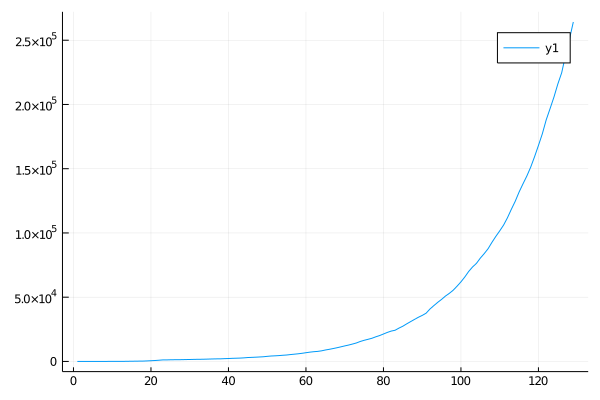

In [69]:
plot(sadata)

In [70]:
confirmeddate = String.(names(datacopy))[48:end] # apply STring function to each element

129-element Array{String,1}:
 "3/5/20"
 "3/6/20"
 "3/7/20"
 "3/8/20"
 "3/9/20"
 "3/10/20"
 "3/11/20"
 "3/12/20"
 "3/13/20"
 "3/14/20"
 "3/15/20"
 "3/16/20"
 "3/17/20"
 ⋮
 "6/30/20"
 "7/1/20"
 "7/2/20"
 "7/3/20"
 "7/4/20"
 "7/5/20"
 "7/6/20"
 "7/7/20"
 "7/8/20"
 "7/9/20"
 "7/10/20"
 "7/11/20"

Parse: convert string representation into a Julia object:

In [71]:
confirmeddate[1]

"3/5/20"

using Dates which comes with Julia

In [72]:
format = Dates.DateFormat("m/d/y") #Month, Date, Year

dateformat"m/d/y"

In [73]:
parse(Date, confirmeddate[1], format) + Year(2000)

2020-03-05

In [74]:
confirmeddays = parse.(Date, confirmeddate, format) .+ Year(2000)

129-element Array{Date,1}:
 2020-03-05
 2020-03-06
 2020-03-07
 2020-03-08
 2020-03-09
 2020-03-10
 2020-03-11
 2020-03-12
 2020-03-13
 2020-03-14
 2020-03-15
 2020-03-16
 2020-03-17
 ⋮
 2020-06-30
 2020-07-01
 2020-07-02
 2020-07-03
 2020-07-04
 2020-07-05
 2020-07-06
 2020-07-07
 2020-07-08
 2020-07-09
 2020-07-10
 2020-07-11

Testing subjects:

***plot(confirmeddays, sadata, label="time line", #xticks=confirmed_days[1:14:end], xrotation=45, leg=:topleft)***

***scatter!(confirmeddays, sadata, label="confirmed days")***

Straight line on semi-log means ***exponential growth***

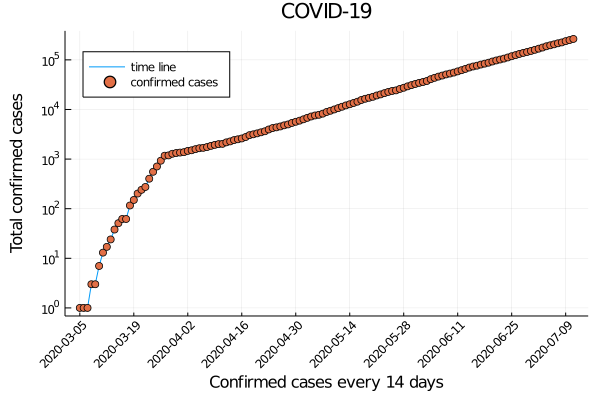

In [75]:
# Notes
# confirmeddays = x
# sadata = y.
# xticks=confirmed_days[1:14:end] : Every 14 days
# label="time line" m=:o  The letter o form the point in the graph

covid19confirmedcases = plot(confirmeddays, label="time line", sadata,
                                xticks=confirmeddays[1:14:end], 
                                xrotation=45, leg=:topleft, yscale=:log10)
    scatter!(confirmeddays, sadata, 
            linewidths=1, label = "confirmed cases")

xlabel!("Confirmed cases every 14 days")
ylabel!("Total confirmed cases")
title!("COVID-19")



***TESTING ZONE***

In [76]:
gr()

Plots.GRBackend()

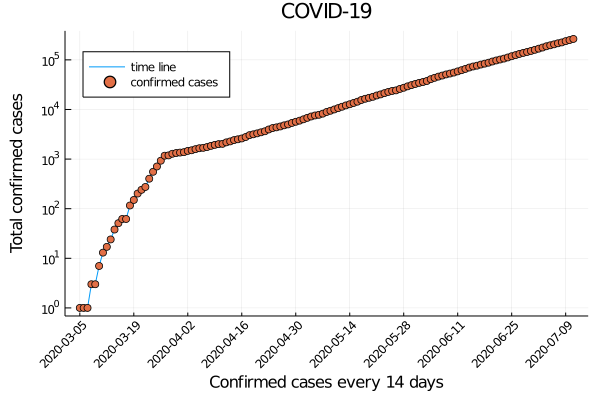

In [78]:
#Notes:
#Added scatter!()
#confirmeddays = x
#sadata = y.
#xticks=confirmeddays[1:14:end] : Every 14 days
#optional label="time line" m=:o  The letter o form the point in the graph

covid19confirmedcases = plot(confirmeddays, label="time line", sadata,
                                xticks=confirmeddays[1:14:end], 
                                xrotation=45, leg=:topleft, yscale=:log10)
    scatter!(confirmeddays, sadata, 
            linewidths=1, label = "confirmed cases")

xlabel!("Confirmed cases every 14 days")
ylabel!("Total confirmed cases")
title!("COVID-19")


Using PlotThemes

Currently the following themes are available:

:default

:dark

:ggplot2

:juno

:lime

:orange

:sand

:solarized

:solarized_light

:wong

:wong2

:gruvbox_dark

:gruvbox_light

:bright

:vibrant

:mute

i.e. theme(:sand)

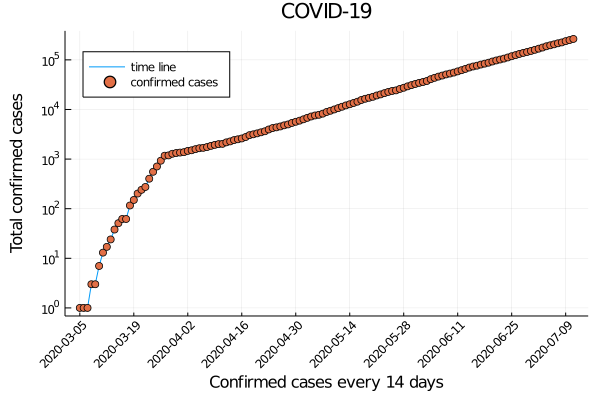

In [79]:
#Notes:
#Added scatter!()
#confirmeddays = x
#sadata = y.
#xticks=confirmeddays[1:14:end] : Every 14 days
#optional label="time line" m=:o  The letter o form the point in the graph

covid19confirmedcases = plot(confirmeddays, label="time line", sadata,
                                xticks=confirmeddays[1:14:end], 
                                xrotation=45, leg=:topleft, yscale=:log10)
    scatter!(confirmeddays, sadata, 
            linewidths=1, label = "confirmed cases")

theme(:default)
xlabel!("Confirmed cases every 14 days")
ylabel!("Total confirmed cases")
title!("COVID-19")


In [80]:
function coronavirus()
    return covid19confirmedcases #or @show sa_covid_19_cases
end

coronavirus (generic function with 1 method)

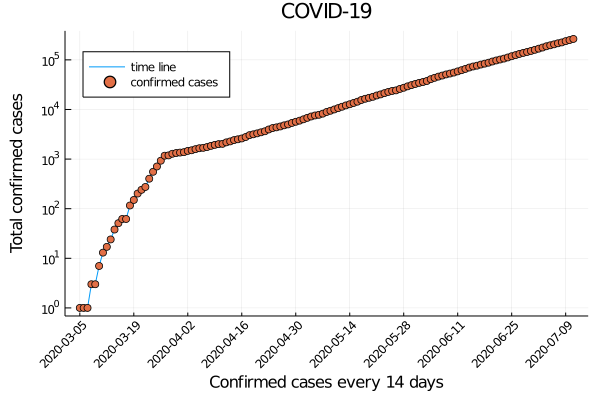

In [81]:
coronavirus()

*** END OF TESTING ZONE***